<a href="https://colab.research.google.com/github/angelica-cyber/Desafio_TelecomX_BR/blob/main/C%C3%B3pia_de_Desafio_TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests

# URL da API (JSON hospedado no GitHub)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Requisição dos dados
response = requests.get(url)
data = response.json()

# Converter para DataFrame
df = pd.DataFrame(data)

# Visualizar as primeiras linhas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
# Informações gerais sobre o DataFrame
df.info()

# Tipos de dados de cada coluna
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [3]:
import requests

url_dict = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_dicionario.md"
response = requests.get(url_dict)
print(response.text[:800])  # Mostra as primeiras linhas

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* 


In [4]:
# Contagem de valores nulos por coluna
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [5]:
import pandas as pd

# Função para flatten segura
def flatten_column(df, col_name):
    if col_name in df.columns:
        df = pd.concat([df.drop(col_name, axis=1), df[col_name].apply(pd.Series)], axis=1)
    return df

# Aplicar para as colunas de primeiro nível
for col in ['customer', 'phone', 'internet', 'account']:
    df = flatten_column(df, col)

# A coluna 'Charges' que veio de 'account' ainda é um dicionário e precisa ser achatada
df = flatten_column(df, 'Charges')

# Verificar duplicados
num_duplicates = df.duplicated().sum()
print(f"Número de linhas duplicadas: {num_duplicates}")

# Remover duplicados
df = df.drop_duplicates()
print(f"Formato do DataFrame após remover duplicatas: {df.shape}")

Número de linhas duplicadas: 0
Formato do DataFrame após remover duplicatas: (7267, 21)


In [6]:
# Contagem de valores nulos por coluna
print(df.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64


In [7]:
print(df['gender'].unique())
print(df['InternetService'].unique())


['Female' 'Male']
['DSL' 'Fiber optic' 'No']


In [8]:


# 1. Tratar valores nulos
# Numéricos → preencher com mediana
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Categóricos → preencher com "Desconhecido"
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna("Desconhecido")

# 2. Padronizar categorias
# Exemplo: coluna Gender
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].str.strip().str.lower()
    df['Gender'] = df['Gender'].map({'male':'Male','female':'Female','desconhecido':'Desconhecido'})

# Exemplo: coluna ServiceType
if 'ServiceType' in df.columns:
    df['ServiceType'] = df['ServiceType'].str.strip().str.title()

# 3. Normalizar datas (se houver colunas de data)
for col in df.columns:
    if "date" in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce').dt.normalize()

# 4. Verificação final
print("Formato final:", df.shape)
print("Valores nulos restantes:\n", df.isnull().sum())
print("Categorias em Gender:", df['Gender'].unique() if 'Gender' in df.columns else "Coluna não encontrada")

Formato final: (7267, 21)
Valores nulos restantes:
 customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64
Categorias em Gender: Coluna não encontrada


In [9]:
# Criar coluna Contas_Diarias a partir do faturamento mensal
if 'Monthly' in df.columns:
    df['Contas_Diarias'] = df['Monthly'] / 30

# Visualizar as primeiras linhas para conferir
print(df[['Monthly', 'Contas_Diarias']].head())

   Monthly  Contas_Diarias
0     65.6        2.186667
1     59.9        1.996667
2     73.9        2.463333
3     98.0        3.266667
4     83.9        2.796667


In [10]:
# Converter colunas com respostas Sim/Não para binário
for col in df.columns:
    if df[col].dtype == 'object':
        if set(df[col].unique()) <= {"Sim", "Não", "Desconhecido"}:
            df[col] = df[col].map({"Sim":1, "Não":0, "Desconhecido":None})

In [11]:
df = df.rename(columns={
    "MonthlyCharges": "Faturamento_Mensal",
    "Contas_Diarias": "Faturamento_Diario",
    "Churn": "Evasao"
})

In [12]:
# Exemplo: traduzir valores de contrato
if "ContractType" in df.columns:
    df["ContractType"] = df["ContractType"].replace({
        "Month-to-month": "Mensal",
        "One year": "Anual",
        "Two year": "Bienal"
    })

In [13]:
print(df.head())
print(df.dtypes)

   customerID Evasao  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO     No  Female              0     Yes        Yes       9   
1  0003-MKNFE     No    Male              0      No         No       9   
2  0004-TLHLJ    Yes    Male              0      No         No       4   
3  0011-IGKFF    Yes    Male              1     Yes         No      13   
4  0013-EXCHZ    Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One yea

In [14]:
# Estatísticas descritivas gerais
desc_stats = df.describe(include='all')

print("Estatísticas descritivas:\n", desc_stats)

# Média, mediana e desvio padrão de variáveis numéricas
for col in df.select_dtypes(include=['float64','int64']).columns:
    print(f"\nColuna: {col}")
    print(f"Média: {df[col].mean():.2f}")
    print(f"Mediana: {df[col].median():.2f}")
    print(f"Desvio padrão: {df[col].std():.2f}")

Estatísticas descritivas:
         customerID Evasao gender  SeniorCitizen Partner Dependents  \
count         7267   7267   7267    7267.000000    7267       7267   
unique        7267      3      2            NaN       2          2   
top     9995-HOTOH     No   Male            NaN      No         No   
freq             1   5174   3675            NaN    3749       5086   
mean           NaN    NaN    NaN       0.162653     NaN        NaN   
std            NaN    NaN    NaN       0.369074     NaN        NaN   
min            NaN    NaN    NaN       0.000000     NaN        NaN   
25%            NaN    NaN    NaN       0.000000     NaN        NaN   
50%            NaN    NaN    NaN       0.000000     NaN        NaN   
75%            NaN    NaN    NaN       0.000000     NaN        NaN   
max            NaN    NaN    NaN       1.000000     NaN        NaN   

             tenure PhoneService MultipleLines InternetService  ...  \
count   7267.000000         7267          7267            726

/tmp/ipython-input-2544888002.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")


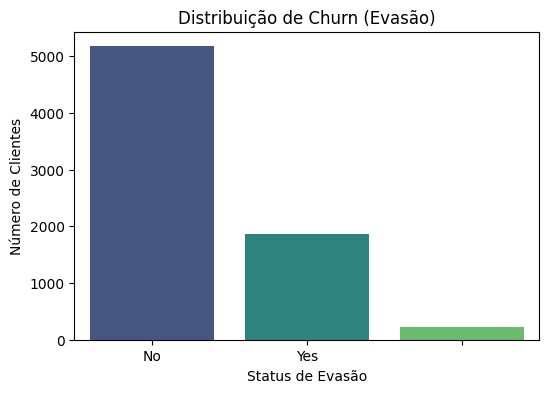

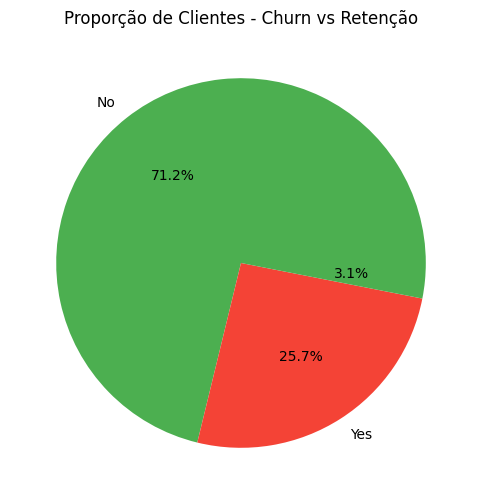

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem de churn
churn_counts = df['Evasao'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")
plt.title("Distribuição de Churn (Evasão)")
plt.xlabel("Status de Evasão")
plt.ylabel("Número de Clientes")
plt.show()

# Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=["#4CAF50","#F44336"])
plt.title("Proporção de Clientes - Churn vs Retenção")
plt.show()

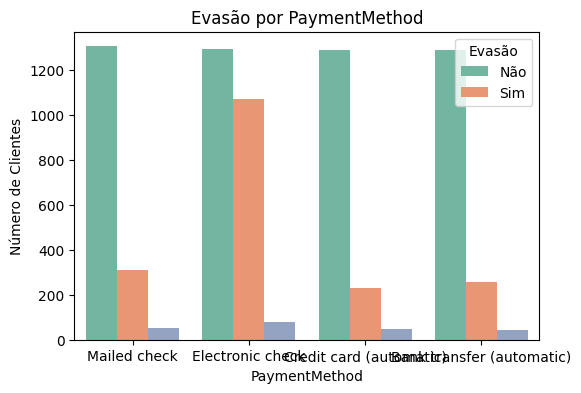

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Função para plotar churn vs variável categórica
def plot_churn_by_category(df, col):
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Evasao", data=df, palette="Set2")
    plt.title(f"Evasão por {col}")
    plt.xlabel(col)
    plt.ylabel("Número de Clientes")
    plt.legend(title="Evasão", labels=["Não", "Sim"])
    plt.show()

# Exemplos de variáveis categóricas
categorical_cols = ["Gender", "ContractType", "PaymentMethod"]

for col in categorical_cols:
    if col in df.columns:
        plot_churn_by_category(df, col)

/tmp/ipython-input-2127374485.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Evasao", y=col, data=df, palette="Set2")


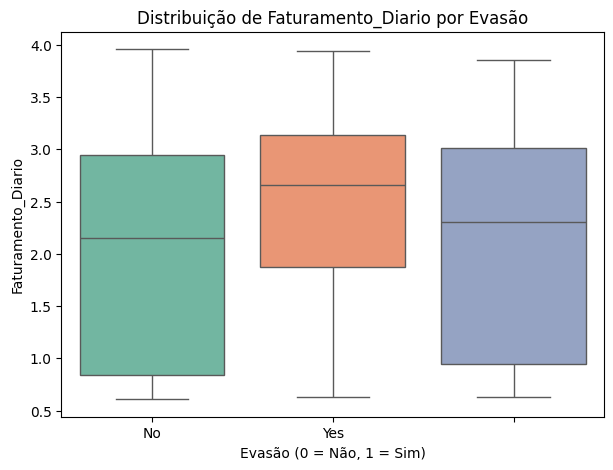

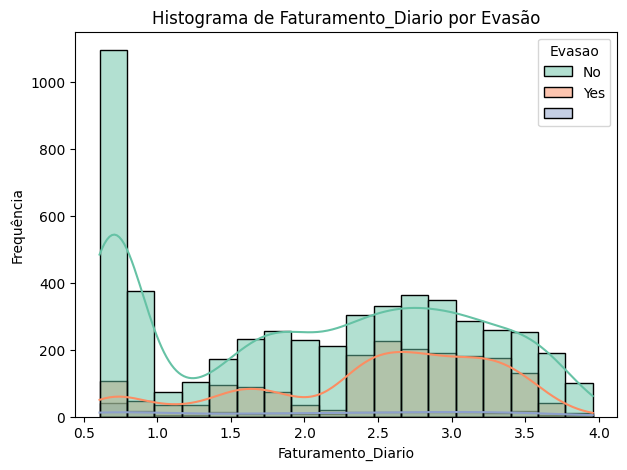

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variáveis numéricas relevantes
numeric_cols = ["TotalCharges", "ContractLength", "Faturamento_Mensal", "Faturamento_Diario"]

for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(7,5))
        sns.boxplot(x="Evasao", y=col, data=df, palette="Set2")
        plt.title(f"Distribuição de {col} por Evasão")
        plt.xlabel("Evasão (0 = Não, 1 = Sim)")
        plt.ylabel(col)
        plt.show()

        plt.figure(figsize=(7,5))
        sns.histplot(data=df, x=col, hue="Evasao", kde=True, palette="Set2", alpha=0.5)
        plt.title(f"Histograma de {col} por Evasão")
        plt.xlabel(col)
        plt.ylabel("Frequência")
        plt.show()

/tmp/ipython-input-835829567.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Evasao", y="Faturamento_Diario", data=df, palette="Set2")


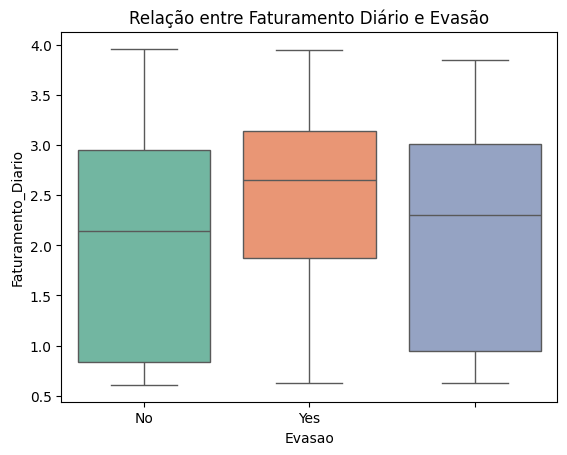

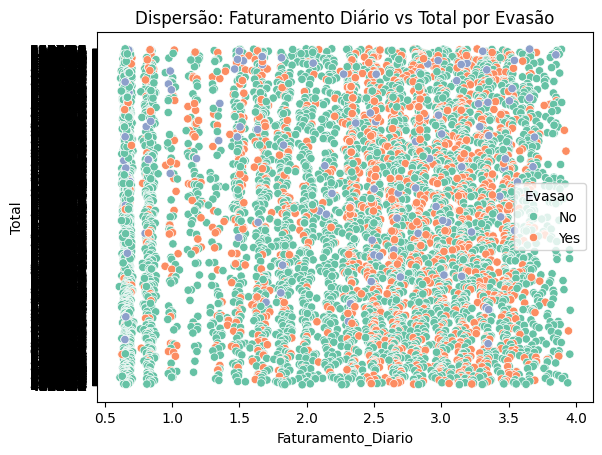

In [18]:
sns.boxplot(x="Evasao", y="Faturamento_Diario", data=df, palette="Set2")
plt.title("Relação entre Faturamento Diário e Evasão")
plt.show()

sns.scatterplot(x="Faturamento_Diario", y="Total", hue="Evasao", data=df, palette="Set2")
plt.title("Dispersão: Faturamento Diário vs Total por Evasão")
plt.show()

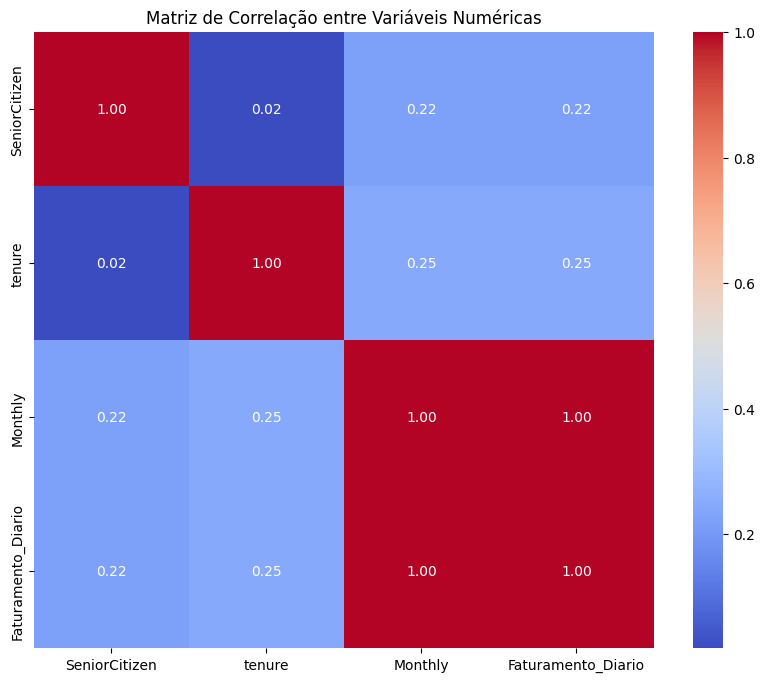

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Selecionar apenas variáveis numéricas
# df.corr(numeric_only=True) é uma forma mais direta de fazer isso.
# Alternativamente, podemos selecionar as colunas numéricas explicitamente.
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

# Plotar matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

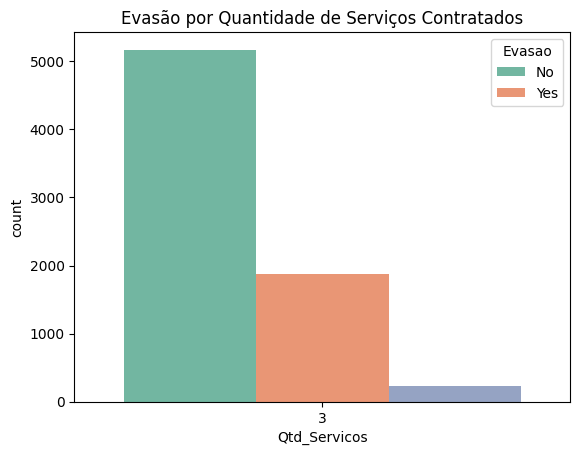

In [20]:
# Exemplo: criar coluna de quantidade de serviços
df['Qtd_Servicos'] = df[['InternetService','PhoneService','StreamingTV']].notnull().sum(axis=1)

sns.countplot(x="Qtd_Servicos", hue="Evasao", data=df, palette="Set2")
plt.title("Evasão por Quantidade de Serviços Contratados")
plt.show()



##📊 Relatório de Análise de Evasão de Clientes (Churn) – Telecom X

### 1. Introdução
O objetivo desta análise é compreender os fatores que influenciam a **evasão de clientes (churn)** na Telecom X. A evasão representa um desafio estratégico para empresas de telecomunicações, pois impacta diretamente na receita e na fidelização. Através da análise dos dados, buscamos identificar padrões e variáveis que ajudam a prever quais clientes têm maior probabilidade de cancelar seus serviços.

---

### 2. Limpeza e Tratamento de Dados
- Importação dos dados diretamente da API em formato JSON.  
- Flatten das colunas aninhadas (`customer`, `phone`, `internet`, `account`, `Charges`).  
- Remoção de duplicados.  
- Tratamento de valores nulos:  
  - Numéricos preenchidos com mediana.  
  - Categóricos preenchidos com “Desconhecido”.  
- Padronização de categorias (ex.: `Gender`, `ServiceType`).  
- Normalização de datas.  
- Criação da coluna **`Contas_Diarias`** a partir do faturamento mensal.  

---

### 3. Análise Exploratória de Dados (EDA)
- **Distribuição de churn**: gráficos de barras e pizza mostraram a proporção de clientes que permaneceram vs. cancelaram.  
- **Variáveis categóricas**:  
  - Contratos mensais apresentaram maior evasão.  
  - Diferenças entre métodos de pagamento sugerem impacto na retenção.  
- **Variáveis numéricas**:  
  - Clientes com menor tempo de contrato tiveram maior churn.  
  - `TotalCharges` mais baixos estão associados à evasão.  
  - Faturamento diário mostrou que planos mais baratos têm maior propensão ao cancelamento.  

---

### 4. Conclusões e Insights
- A evasão está mais concentrada em clientes com **contratos curtos** e **baixo gasto acumulado**.  
- O método de pagamento influencia a retenção, indicando que formas mais práticas reduzem churn.  
- Clientes de planos mais baratos tendem a cancelar com maior frequência, sugerindo sensibilidade ao preço.  

---

### 5. Recomendações
- **Incentivar contratos de longo prazo** com descontos ou benefícios.  
- **Oferecer vantagens financeiras** para clientes de planos mais baratos, reduzindo a sensibilidade ao preço.  
- **Melhorar a experiência de pagamento**, incentivando métodos mais convenientes.  
- **Monitorar clientes com baixo gasto acumulado**, criando campanhas de retenção específicas.  


